importing packages

In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy
seed = 12

path set

In [4]:
os.chdir(r'/home/devbox2/chetanya/dataSheets/')
os.getcwd()

'/home/devbox2/chetanya/dataSheets'

fetch the excel

In [6]:
retail=pd.read_excel('Online Retail.xlsx','Online Retail',index_col=None, na_values=['NA'])
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null datetime64[ns]
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


Filtering out the negative data cuz that is dirty data, we dont wanna recommend the items which were returned or rejected 

In [7]:
retail_noNegative=retail[retail['Quantity']>0]
retail_noNegative=retail_noNegative[retail_noNegative['UnitPrice']>0]
retail_noNegative.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 530104 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      530104 non-null object
StockCode      530104 non-null object
Description    530104 non-null object
Quantity       530104 non-null int64
InvoiceDate    530104 non-null datetime64[ns]
UnitPrice      530104 non-null float64
CustomerID     397884 non-null float64
Country        530104 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 36.4+ MB


removing the null description feilds

In [8]:
retail_notnull=retail_noNegative[retail_noNegative['Description'].notnull()]
retail_notnull.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 530104 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      530104 non-null object
StockCode      530104 non-null object
Description    530104 non-null object
Quantity       530104 non-null int64
InvoiceDate    530104 non-null datetime64[ns]
UnitPrice      530104 non-null float64
CustomerID     397884 non-null float64
Country        530104 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 36.4+ MB


removing unneccesary columns

In [9]:
retail_notnull=retail_notnull.drop(['InvoiceDate', 'CustomerID','Country'],axis=1)
retail_notnull.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 530104 entries, 0 to 541908
Data columns (total 5 columns):
InvoiceNo      530104 non-null object
StockCode      530104 non-null object
Description    530104 non-null object
Quantity       530104 non-null int64
UnitPrice      530104 non-null float64
dtypes: float64(1), int64(1), object(3)
memory usage: 24.3+ MB


turning the Stock codes and description to lower case

In [10]:
retail_notnull['StockCode']=retail_notnull['StockCode'].apply(lambda x: str(x).lower())
retail_notnull['Description']=retail_notnull['Description'].apply(lambda x: str(x).lower())
retail_notnull.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice
0,536365,85123a,white hanging heart t-light holder,6,2.55
1,536365,71053,white metal lantern,6,3.39
2,536365,84406b,cream cupid hearts coat hanger,8,2.75
3,536365,84029g,knitted union flag hot water bottle,6,3.39
4,536365,84029e,red woolly hottie white heart.,6,3.39


removing alpha numeric invoice no which is a bad data

In [11]:
retail_notnull=retail_notnull[retail_notnull['InvoiceNo'].apply(lambda x: isinstance(x, (int, np.int64)))]

type casting Invoice no Data type from object to Int64
forming a new 'retail_clean' and dropping Quantity

In [12]:
retail_notnull['InvoiceNo']=retail_notnull['InvoiceNo'].astype('int64')
retail_clean=retail_notnull
#retail_clean=retail_clean.drop('Quantity', axis=1)
retail_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 530103 entries, 0 to 541908
Data columns (total 5 columns):
InvoiceNo      530103 non-null int64
StockCode      530103 non-null object
Description    530103 non-null object
Quantity       530103 non-null int64
UnitPrice      530103 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 24.3+ MB


removing 'spaces' from Description to get rid of any duplicate description

In [13]:
len(retail_clean['Description'].unique())

4025

In [14]:
retail_clean['Description']=retail_clean['Description'].str.replace(' ', '')

In [15]:
print(len(retail_clean['Description'].unique()))
print(len(retail_clean['StockCode'].unique()))
print(len(retail_clean['InvoiceNo'].unique()))
print(len(retail_clean['UnitPrice'].unique()))

3997
3811
19959
1290


In [16]:
retail_clean.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice
0,536365,85123a,whitehangingheartt-lightholder,6,2.55
1,536365,71053,whitemetallantern,6,3.39
2,536365,84406b,creamcupidheartscoathanger,8,2.75
3,536365,84029g,knittedunionflaghotwaterbottle,6,3.39
4,536365,84029e,redwoollyhottiewhiteheart.,6,3.39


In [17]:
retail_clean.to_csv('retail_clean.csv',index=False)

In [19]:
test_retail_clean=pd.read_csv('test_cleanest_edited.csv')
#test_retail_clean=test_retail_clean[test_retail_clean['CountInvoices']>1]
test_retail_clean.head()

,Description,CountInvoices
0,*boomboxipodclassic,1
1,*usbofficemirrorball,2
2,10colourspaceboypen,318
3,12colouredpartyballoons,163
4,12daisypegsinwoodbox,77


In [20]:
retail_dropped=retail_clean.drop(['InvoiceNo','StockCode'],axis=1)
retail_dropped.groupby('Description')['UnitPrice'].unique().head()


Description
*boomboxipodclassic                                     [16.98]
*usbofficemirrorball                                     [8.47]
10colourspaceboypen        [0.85, 1.66, 2.51, 1.63, 2.46, 0.72]
12colouredpartyballoons                [0.65, 1.28, 1.25, 0.63]
12daisypegsinwoodbox                         [1.65, 3.36, 3.29]
Name: UnitPrice, dtype: object

In [21]:
retail_dropped_median=retail_dropped.groupby('Description')['UnitPrice'].median()
retail_dropped_median.head()



Description
*boomboxipodclassic        16.98
*usbofficemirrorball        8.47
10colourspaceboypen         0.85
12colouredpartyballoons     0.65
12daisypegsinwoodbox        1.65
Name: UnitPrice, dtype: float64

In [22]:
retail_dropped_median.to_csv('retail_dropped_median.csv', index=True)

In [23]:
retail_dropped_median_edited=pd.read_csv('retail_dropped_median.csv',header=None)
retail_dropped_median_edited.columns = ['Description','UnitPrice']
#retail_dropped_median_edited=retail_dropped_median_edited[retail_dropped_median_edited['UnitPrice']>0.42]
retail_dropped_median_edited.head()

,Description,UnitPrice
0,*boomboxipodclassic,16.98
1,*usbofficemirrorball,8.47
2,10colourspaceboypen,0.85
3,12colouredpartyballoons,0.65
4,12daisypegsinwoodbox,1.65


In [24]:
demo=pd.merge(test_retail_clean,retail_dropped_median_edited,on='Description')

In [25]:
demo.head()

,Description,CountInvoices,UnitPrice
0,*boomboxipodclassic,1,16.98
1,*usbofficemirrorball,2,8.47
2,10colourspaceboypen,318,0.85
3,12colouredpartyballoons,163,0.65
4,12daisypegsinwoodbox,77,1.65


In [26]:
demo['logCountInvoices'] = np.log10(demo['CountInvoices'])
demo['logUnitPrice'] = np.log10(demo['UnitPrice'])
demo.head()

,Description,CountInvoices,UnitPrice,logCountInvoices,logUnitPrice
0,*boomboxipodclassic,1,16.98,0.000000,1.229938
1,*usbofficemirrorball,2,8.47,0.301030,0.927883
2,10colourspaceboypen,318,0.85,2.502427,-0.070581
3,12colouredpartyballoons,163,0.65,2.212188,-0.187087
4,12daisypegsinwoodbox,77,1.65,1.886491,0.217484


In [27]:
demo.median()

CountInvoices       63.000000
UnitPrice            2.100000
logCountInvoices     1.799341
logUnitPrice         0.322219
dtype: float64

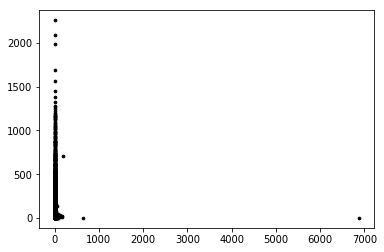

In [29]:
#demo.plot('UnitPrice','CountInvoices',kind='scatter',logx=True,logy=True)
f1 = demo['UnitPrice'].values
f2 = demo['CountInvoices'].values
X1 = np.array(list(zip(f1, f2)))
plt.scatter(f1, f2, c='black', s=7)



In [25]:
#demo['UnitPrice'].quantile(q=.1)

In [26]:
#demo['CountInvoices'].quantile(q=.1)

[[ 1.22993769  0.        ]
 [ 0.92788341  0.30103   ]
 [-0.07058107  2.50242712]
 ...
 [-0.07058107  2.42975228]
 [ 1.01703334  1.20411998]
 [ 0.57403127  1.36172784]]


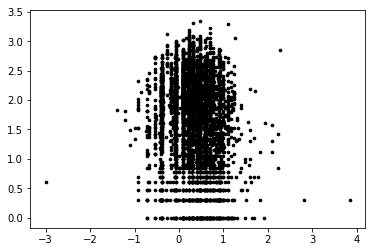

In [30]:
#demo.plot('logUnitPrice','logCountInvoices',kind='scatter',logx=True,logy=True)
f3 = demo['logUnitPrice'].values
f4 = demo['logCountInvoices'].values
X2 = np.array(list(zip(f3, f4)))
plt.scatter(f3, f4, c='black', s=7)
print(X2)

for f1 and f2

In [31]:
# Euclidean Distance Caculator
#def dist(a, b, ax=1):
#    return np.linalg.norm(a - b, axis=ax)

In [32]:
'''# Number of clusters
k = 3
# X coordinates of random centroids
C_x = np.random.randint(0, np.max(X1)-2.08, size=k)
# Y coordinates of random centroids
C_y = np.random.randint(0, np.max(X1)-70, size=k)
C = np.array(list(zip(C_x, C_y)), dtype=np.float32)
print(C)
'''

'# Number of clusters\nk = 3\n# X coordinates of random centroids\nC_x = np.random.randint(0, np.max(X1)-2.08, size=k)\n# Y coordinates of random centroids\nC_y = np.random.randint(0, np.max(X1)-70, size=k)\nC = np.array(list(zip(C_x, C_y)), dtype=np.float32)\nprint(C)\n'

In [33]:
'''# Plotting along with the Centroids
plt.scatter(f1, f2, c='#050505', s=7)
plt.scatter(C_x, C_y, marker='*', s=200, c='g')
'''

"# Plotting along with the Centroids\nplt.scatter(f1, f2, c='#050505', s=7)\nplt.scatter(C_x, C_y, marker='*', s=200, c='g')\n"

In [34]:
'''# To store the value of centroids when it updates
C_old = np.zeros(C.shape)
# Cluster Lables(0, 1, 2)
clusters = np.zeros(len(X1))
# Error func. - Distance between new centroids and old centroids
error = dist(C, C_old, None)
# Loop will run till the error becomes zero
while error != 0:
    # Assigning each value to its closest cluster
    for i in range(len(X1)):
        distances = dist(X1[i], C)
        cluster = np.argmin(distances)
        clusters[i] = cluster
    # Storing the old centroid values
    C_old = deepcopy(C)
    # Finding the new centroids by taking the average value
    for i in range(k):
        points = [X1[j] for j in range(len(X1)) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)
    error = dist(C, C_old, None)
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([X1[j] for j in range(len(X1)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='#050505')
'''

"# To store the value of centroids when it updates\nC_old = np.zeros(C.shape)\n# Cluster Lables(0, 1, 2)\nclusters = np.zeros(len(X1))\n# Error func. - Distance between new centroids and old centroids\nerror = dist(C, C_old, None)\n# Loop will run till the error becomes zero\nwhile error != 0:\n    # Assigning each value to its closest cluster\n    for i in range(len(X1)):\n        distances = dist(X1[i], C)\n        cluster = np.argmin(distances)\n        clusters[i] = cluster\n    # Storing the old centroid values\n    C_old = deepcopy(C)\n    # Finding the new centroids by taking the average value\n    for i in range(k):\n        points = [X1[j] for j in range(len(X1)) if clusters[j] == i]\n        C[i] = np.mean(points, axis=0)\n    error = dist(C, C_old, None)\ncolors = ['r', 'g', 'b', 'y', 'c', 'm']\nfig, ax = plt.subplots()\nfor i in range(k):\n        points = np.array([X1[j] for j in range(len(X1)) if clusters[j] == i])\n        ax.scatter(points[:, 0], points[:, 1], s=7, c=co

In [35]:
from sklearn.cluster import KMeans

# Number of clusters
kmeans = KMeans(n_clusters=2)
# Fitting the input data
kmeans = kmeans.fit(X1)
# Getting the cluster labels
labels = kmeans.predict(X1)
# Centroid values
centroids = kmeans.cluster_centers_

In [36]:
# Comparing with scikit-learn centroids
#print(C) # From Scratch
print(centroids) # From sci-kit learn

[[  5.76614181  77.24936816]
 [  3.20816514 561.70642202]]


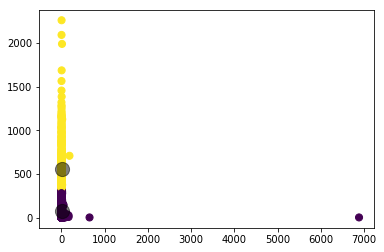

In [37]:
plt.scatter(X1[:, 0], X1[:, 1], c=labels, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=200, alpha=0.5);

In [38]:
from sklearn.cluster import KMeans

# Number of clusters
kmeans = KMeans(n_clusters=3,random_state=99)
# Fitting the input data
kmeans = kmeans.fit(X2)
# Getting the cluster labels
labels = kmeans.predict(X2)
# Centroid values
centroids = kmeans.cluster_centers_

In [39]:
# Comparing with scikit-learn centroids
#print(C) # From Scratch
print(centroids) # From sci-kit learn

[[0.4118755  1.56186242]
 [0.17603143 2.31276735]
 [0.41901218 0.54731695]]


In [40]:
from sklearn.cluster import KMeans

# Number of clusters
kmeans = KMeans(n_clusters=3,random_state=99)
# Fitting the input data
kmeans = kmeans.fit(X2)
# Getting the cluster labels
labels = kmeans.predict(X2)
# Centroid values
centroids = kmeans.cluster_centers_

In [41]:
# Comparing with scikit-learn centroids
#print(C) # From Scratch
print(centroids) # From sci-kit learn

[[0.4118755  1.56186242]
 [0.17603143 2.31276735]
 [0.41901218 0.54731695]]


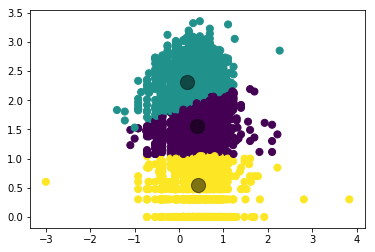

In [42]:
plt.scatter(X2[:, 0], X2[:, 1], c=labels, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=200, alpha=0.5);

In [43]:
cluster_index=kmeans.fit_predict(X2)

In [44]:
demo['Cluster_index']=pd.DataFrame(cluster_index, dtype='int64')
cluster_index

array([2, 2, 1, ..., 1, 0, 0], dtype=int32)

In [45]:
demo.groupby('Cluster_index')['CountInvoices'].mean()

Cluster_index
0     43.660187
1    264.355981
2      4.654628
Name: CountInvoices, dtype: float64

In [46]:
demo.groupby('Cluster_index')['CountInvoices'].max()

Cluster_index
0     155
1    2260
2      11
Name: CountInvoices, dtype: int64

In [47]:
demo.groupby('Cluster_index')['CountInvoices'].min()

Cluster_index
0    12
1    34
2     1
Name: CountInvoices, dtype: int64

In [48]:
demo.groupby('Cluster_index')['UnitPrice'].mean()

Cluster_index
0     4.454568
1     2.360842
2    13.181971
Name: UnitPrice, dtype: float64

In [49]:
demo.groupby('Cluster_index')['UnitPrice'].max()

Cluster_index
0     165.000
1     185.470
2    6880.545
Name: UnitPrice, dtype: float64

In [50]:
demo.groupby('Cluster_index')['UnitPrice'].min()

Cluster_index
0    0.080
1    0.040
2    0.001
Name: UnitPrice, dtype: float64

In [51]:
demo.head(18)

,Description,CountInvoices,UnitPrice,logCountInvoices,logUnitPrice,Cluster_index
0,*boomboxipodclassic,1,16.98,0.000000,1.229938,2
1,*usbofficemirrorball,2,8.47,0.301030,0.927883,2
2,10colourspaceboypen,318,0.85,2.502427,-0.070581,1
3,12colouredpartyballoons,163,0.65,2.212188,-0.187087,1
4,12daisypegsinwoodbox,77,1.65,1.886491,0.217484,0
5,12egghousepaintedwood,99,12.75,1.995635,1.105510,0
6,12hangingeggshandpainted,7,2.08,0.845098,0.318063,2
7,12ivoryrosepegplacesettings,148,1.25,2.170262,0.096910,1
8,12messagecardswithenvelopes,251,1.65,2.399674,0.217484,1
9,12pencilsmalltubewoodland,355,0.65,2.550228,-0.187087,1


In [52]:
demo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3997 entries, 0 to 3996
Data columns (total 6 columns):
Description         3997 non-null object
CountInvoices       3997 non-null int64
UnitPrice           3997 non-null float64
logCountInvoices    3997 non-null float64
logUnitPrice        3997 non-null float64
Cluster_index       3997 non-null int64
dtypes: float64(3), int64(2), object(1)
memory usage: 218.6+ KB


In [53]:
retail_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 530103 entries, 0 to 541908
Data columns (total 5 columns):
InvoiceNo      530103 non-null int64
StockCode      530103 non-null object
Description    530103 non-null object
Quantity       530103 non-null int64
UnitPrice      530103 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 44.3+ MB


In [54]:
retail_new_clean = pd.merge(retail_clean,demo) 

In [55]:
retail_new_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 363096 entries, 0 to 363095
Data columns (total 9 columns):
InvoiceNo           363096 non-null int64
StockCode           363096 non-null object
Description         363096 non-null object
Quantity            363096 non-null int64
UnitPrice           363096 non-null float64
CountInvoices       363096 non-null int64
logCountInvoices    363096 non-null float64
logUnitPrice        363096 non-null float64
Cluster_index       363096 non-null int64
dtypes: float64(3), int64(4), object(2)
memory usage: 27.7+ MB


In [56]:
retail_new_clean.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CountInvoices,logCountInvoices,logUnitPrice,Cluster_index
0,536366,22632,handwarmerredpolkadot,6,1.85,18,1.255273,0.267172,0
1,536372,22632,handwarmerredpolkadot,6,1.85,18,1.255273,0.267172,0
2,536377,22632,handwarmerredpolkadot,6,1.85,18,1.255273,0.267172,0
3,536399,22632,handwarmerredpolkadot,6,1.85,18,1.255273,0.267172,0
4,536407,22632,handwarmerredpolkadot,6,1.85,18,1.255273,0.267172,0


In [57]:
retail_new_clean.to_csv('retail_another_new_clean.csv', index=False)

In [58]:
retail_new_clean1 = retail_new_clean.iloc[:,[0,2]]
len(retail_new_clean1["InvoiceNo"].unique())

18151

In [54]:
'''#retail_new_clean1 = retail_new_clean1.set_index('InvoiceNo')
    retail_new_clean1.head()
'''

"#retail_new_clean1 = retail_new_clean1.set_index('InvoiceNo')\n    retail_new_clean1.head()\n"

In [55]:
'''#new = pd.get_dummies(retail_new_clean1.Description)
    new
'''    

'#new = pd.get_dummies(retail_new_clean1.Description)\n    new\n'

In [67]:
Invoice_vs_Description_matrix=(retail_new_clean1.groupby(['InvoiceNo'])
                                .apply(lambda x: {y:1 for y in x['Description']})
                                .apply(pd.Series)
                                .fillna(0)
                                .reset_index())

In [68]:
Invoice_vs_Description_matrix.head()

,InvoiceNo,handwarmerredpolkadot,assortedcolourbirdornament,poppy'splayhousebedroom,poppy'splayhousekitchen,feltcraftprincesscharlottedoll,boxof6assortedcolourteaspoons,homebuildingblockword,lovebuildingblockword,recipeboxwithmetalheart,...,setof6ribbonsparty,set10cardssnowyrobin17099,blackdiamondclusternecklace,set10cardsswirlyxmastree17104,"letter""u""blingkeyring",blueclimbinghydrangaartflower,blingkeyringstand,creamhangingheartt-lightholder,"papercraft,littlebirdie",ivorypendanttripleshellnecklace
0,536366,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,536367,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,536368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,536369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,536370,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [69]:
#Invoice_vs_Description_matrix.info()
Invoice_vs_Description_matrix=Invoice_vs_Description_matrix.set_index('InvoiceNo')

In [70]:
Invoice_vs_Description_matrix['total']=Invoice_vs_Description_matrix.sum(1)

In [71]:
Invoice_vs_Description_matrix.head()

,handwarmerredpolkadot,assortedcolourbirdornament,poppy'splayhousebedroom,poppy'splayhousekitchen,feltcraftprincesscharlottedoll,boxof6assortedcolourteaspoons,homebuildingblockword,lovebuildingblockword,recipeboxwithmetalheart,doormatnewengland,...,set10cardssnowyrobin17099,blackdiamondclusternecklace,set10cardsswirlyxmastree17104,"letter""u""blingkeyring",blueclimbinghydrangaartflower,blingkeyringstand,creamhangingheartt-lightholder,"papercraft,littlebirdie",ivorypendanttripleshellnecklace,total
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536366,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
536367,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0
536368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
536369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
536370,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0


In [61]:
#Invoice_vs_Description_matrix.to_csv('Invoice_vs_Description_matrix.csv')